# Analise de dados do Spotify

Este projeto tem o objetivo o objetivo de realizar uma analise exploratória de alguns dados do meu spotify, aqui estou sendo chamado como User_E.

<a id='indice'></a>

* [1. Puxando os dados do Banco de Dados](#0)
  * [1.1 Usando Pandas](#1_1)
  * [1.2 Usando Pyspark](#1_2)
* [2. Importando as principais bibliotecas do Projeto](#2)
* [3. Transformando O DataFrame Pyspark em DataFrame do Pandas](#3)
  * [3.1 Verificando Tipo de dado e volumetria](#3_1)
* [4.  Definição do que se pretente analisar ](#4--perguntas-que-se-pretende-fazer-aos-dados)
* [5. Verificando quanto tempo de áudio foi escutado.](#5)
* [6. Verificando a média diária de horas escutadas.](#6)
* [7 Verificando se as horas escutadas aumentaram ou diminuíram durante o tempo.](#7)
  * [7.1 Visualizando Gráfico do comportamento de horas escutadas.](#7_1)
* [8. Verificando horas tocas por Ano.](#8)
  * [8.1 Visualizando Gráfico das horas escutadas por ano.](#8_1)
* [9. Verificando quais foram as bandas mais escutadas.](#9)
  * [9.1 Visualizando Gráfico das Bandas Mais Tocadas.](9_1)

<a id='1'></a>
---

[Retorna ao Índice](#indice)
## 1. Puxando os dados do Banco de Dados

<a id='1_1'></a>
---

[Retorna ao Índice](#indice)

### 1.1 Usando Pandas

In [1]:
# import os

# # Carregar variáveis de ambiente
# from dotenv import load_dotenv
# load_dotenv(os.path.join('config', '.env'))

# jana = False
# if jana:
#     db_config = {
#         'host': os.getenv('DB_HOST'),
#         'port': os.getenv('DB_PORT'),
#         'dbname': os.getenv('DB_NAME_JANA'),
#         'user': os.getenv('DB_USER'),
#         'password': os.getenv('DB_PASSWORD')
#     }
# else:
#     db_config = {
#         'host': os.getenv('DB_HOST'),
#         'port': os.getenv('DB_PORT'),
#         'dbname': os.getenv('DB_NAME'),
#         'user': os.getenv('DB_USER'),
#         'password': os.getenv('DB_PASSWORD')
#     }

# from sqlalchemy import create_engine

# # Crie a URL de conexão
# db_url = f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}"

# # Crie o motor de conexão
# engine = create_engine(db_url)

# # Escreva sua consulta SQL
# query = 'SELECT * FROM all_tracks_registry'

# # Leia os dados do banco de dados para um DataFrame do pandas
# df = pd.read_sql(query, engine)
# df.head()

<a id='1_2'></a>
---

[Retorna ao Índice](#indice)
### 1.2 Usando Pyspark

In [2]:
import os
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Carregar variáveis de ambiente
from dotenv import load_dotenv
load_dotenv(os.path.join('config', '.env'))

user_name = 'User_1'
user = True if user_name == 'User_1'  else False

start_time_geral = time.time()

if user:
    db_config = {
        'host': os.getenv('DB_HOST'),
        'port': os.getenv('DB_PORT'),
        'dbname': os.getenv('DB_NAME'),
        'user': os.getenv('DB_USER'),
        'password': os.getenv('DB_PASSWORD')
    }

else:
    db_config = {
        'host': os.getenv('DB_HOST'),
        'port': os.getenv('DB_PORT'),
        'dbname': os.getenv('DB_NAME_2'),
        'user': os.getenv('DB_USER'),
        'password': os.getenv('DB_PASSWORD')
        }


# Configurar SparkSession
spark = SparkSession.builder \
    .appName("PostgreSQL to Spark") \
    .config("spark.jars", "/caminho/para/postgresql-<versao>.jar") \
    .getOrCreate()

# URL de conexão JDBC
jdbc_url = f"jdbc:postgresql://{db_config['host']}:{db_config['port']}/{db_config['dbname']}"

# Propriedades de conexão
connection_properties = {
    "user": db_config['user'],
    "password": db_config['password'],
    "driver": "org.postgresql.Driver"
}

In [4]:
df_spark = spark.read.jdbc(url=jdbc_url, table="all_tracks_registry", properties=connection_properties)
df_spark.show(4)

+-------------------+--------------------+---------+------------+--------------+--------------------------+---------------------------------+--------------------------------+--------------------+------------+-----------------+-------------------+------------+----------+-------+-------+-------+-----------------+--------------+
|                 ts|            platform|ms_played|conn_country|       ip_addr|master_metadata_track_name|master_metadata_album_artist_name|master_metadata_album_album_name|   spotify_track_uri|episode_name|episode_show_name|spotify_episode_uri|reason_start|reason_end|shuffle|skipped|offline|offline_timestamp|incognito_mode|
+-------------------+--------------------+---------+------------+--------------+--------------------------+---------------------------------+--------------------------------+--------------------+------------+-----------------+-------------------+------------+----------+-------+-------+-------+-----------------+--------------+
|2019-11-11 00:1

In [5]:
df_spark.count()

74704

In [6]:
df_spark.printSchema()

root
 |-- ts: timestamp (nullable = true)
 |-- platform: string (nullable = true)
 |-- ms_played: integer (nullable = true)
 |-- conn_country: string (nullable = true)
 |-- ip_addr: string (nullable = true)
 |-- master_metadata_track_name: string (nullable = true)
 |-- master_metadata_album_artist_name: string (nullable = true)
 |-- master_metadata_album_album_name: string (nullable = true)
 |-- spotify_track_uri: string (nullable = true)
 |-- episode_name: string (nullable = true)
 |-- episode_show_name: string (nullable = true)
 |-- spotify_episode_uri: string (nullable = true)
 |-- reason_start: string (nullable = true)
 |-- reason_end: string (nullable = true)
 |-- shuffle: boolean (nullable = true)
 |-- skipped: boolean (nullable = true)
 |-- offline: boolean (nullable = true)
 |-- offline_timestamp: timestamp (nullable = true)
 |-- incognito_mode: boolean (nullable = true)



In [34]:
df_spark_transformado = df_spark.withColumn("ts_transformado", F.col("ts").cast("string")).drop("ts")
df_spark_transformado = df_spark_transformado.withColumn("offline_timestamp_t", F.col("offline_timestamp").cast("string")).drop("offline_timestamp")
df_spark_transformado = df_spark_transformado.withColumnRenamed('master_metadata_track_name', 'trackName')
df_spark_transformado = df_spark_transformado.withColumnRenamed('master_metadata_album_artist_name', 'artistName')
df_spark_transformado = df_spark_transformado.withColumnRenamed('master_metadata_album_album_name', 'albumName')


In [35]:
df_spark_transformado.printSchema()

root
 |-- platform: string (nullable = true)
 |-- ms_played: integer (nullable = true)
 |-- conn_country: string (nullable = true)
 |-- ip_addr: string (nullable = true)
 |-- trackName: string (nullable = true)
 |-- artistName: string (nullable = true)
 |-- albumName: string (nullable = true)
 |-- spotify_track_uri: string (nullable = true)
 |-- episode_name: string (nullable = true)
 |-- episode_show_name: string (nullable = true)
 |-- spotify_episode_uri: string (nullable = true)
 |-- reason_start: string (nullable = true)
 |-- reason_end: string (nullable = true)
 |-- shuffle: boolean (nullable = true)
 |-- skipped: boolean (nullable = true)
 |-- offline: boolean (nullable = true)
 |-- incognito_mode: boolean (nullable = true)
 |-- ts_transformado: string (nullable = true)
 |-- offline_timestamp_t: string (nullable = true)



<a id='2'></a>
---

[Retorna ao Índice](#indice)
## 2. Importando as principais bibliotecas do Projeto

In [36]:
# Importando as bibliotecas:
import pandas as pd
import json
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

# definindo temas da plotagem dos gráficos
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

<a id='3'></a>
---

[Retorna ao Índice](#indice)
## 3. Transformando O DataFrame Pyspark em DataFrame do Pandas

In [37]:
spotify = df_spark_transformado.toPandas()
spotify.sample(5)

,platform,ms_played,conn_country,ip_addr,trackName,artistName,albumName,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_transformado,offline_timestamp_t
44622,"Android OS 10 API 29 (motorola, moto g(7) power)",6380,BR,187.119.231.87,Flutua,Johnny Hooker,Coração,spotify:track:5ZQvlEQGGW7XmgnhgJcIIJ,None,None,None,clickrow,endplay,False,False,False,False,2021-04-13 13:33:53,None
27242,"Android OS 9 API 28 (motorola, moto g(7) power)",179978,BR,177.25.195.19,Cuz I Love You,Lizzo,Cuz I Love You,spotify:track:5gkFxBuUuASmNtmq0T5xSu,None,None,None,appload,trackdone,False,False,False,False,2019-09-24 12:56:59,None
33325,"Android OS 9 API 28 (motorola, moto g(7) power)",804,BR,187.119.229.128,You Are Loving,Timmies,Passion & Confusion,spotify:track:0KTdKLiwmurQgFT7Y9mOM7,None,None,None,clickrow,endplay,True,False,False,False,2019-10-30 13:26:18,None
9579,"Android OS 6.0.1 API 23 (samsung, SM-J500M)",9349,BR,187.119.225.60,Terremoto,Anitta,Terremoto,spotify:track:7G2XZhDNHo7SSDWSVxC0UT,None,None,None,trackdone,backbtn,False,False,True,False,2020-04-05 20:43:17,+52232-01-13 04:35:27.000064
67947,android,192213,BR,177.26.234.183,Never Forget You,Noisettes,Wild Young Hearts,spotify:track:3xxmjMvJsSR3L7mUOxP9QA,None,None,None,trackdone,trackdone,False,False,False,False,2024-01-29 21:21:50,2024-01-29 21:18:38


<a id='3_1'></a>
---

[Retorna ao Índice](#indice)

### 3.1 Verificando Tipo de dado e volumetria

In [38]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74704 entries, 0 to 74703
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   platform             74704 non-null  object
 1   ms_played            74704 non-null  int32 
 2   conn_country         74704 non-null  object
 3   ip_addr              74704 non-null  object
 4   trackName            74543 non-null  object
 5   artistName           74543 non-null  object
 6   albumName            74543 non-null  object
 7   spotify_track_uri    74543 non-null  object
 8   episode_name         161 non-null    object
 9   episode_show_name    160 non-null    object
 10  spotify_episode_uri  161 non-null    object
 11  reason_start         74704 non-null  object
 12  reason_end           74704 non-null  object
 13  shuffle              74704 non-null  bool  
 14  skipped              74704 non-null  bool  
 15  offline              74679 non-null  object
 16  inco

In [39]:
print('{} Linhas e {} colunas'.format(spotify.shape[0], spotify.shape[1]))
print('Quantidade de dados nulos:', spotify.isna().sum().sum())

74704 Linhas e 19 colunas
Quantidade de dados nulos: 270077


In [40]:
# tipos de cada coluna
spotify.dtypes

platform               object
ms_played               int32
conn_country           object
ip_addr                object
trackName              object
artistName             object
albumName              object
spotify_track_uri      object
episode_name           object
episode_show_name      object
spotify_episode_uri    object
reason_start           object
reason_end             object
shuffle                  bool
skipped                  bool
offline                object
incognito_mode           bool
ts_transformado        object
offline_timestamp_t    object
dtype: object

<a id='4'></a>
---

[Retorna ao Índice](#indice)
##  4.  Perguntas que se pretende fazer aos dados:

- **`Pergunta 1:`** Quanto tempo de áudio foi escutado durantes todo esse período.
- **`Pergunta 2:`** Qual foi a média diária de horas escutadas por dia;
- **`Pergunta 3:`** Verificar se as horas escutadas aumentaram ou diminuíram durante o tempo;
- **`Pergunta 4:`** Qual a quantidade de horas tocas por em cada semestres dos dois anos;
- **`Pergunta 5:`** Quais foram as bandas mais escutadas;
- **`Pergunta 6:`** Quais foram as musicas mais tocadas;
- **`Pergunta 7:`** Quais foram os Podcasts mais escutados no geral;
- **`Pergunta 8:`** Quais os Podcasts mais tocados nos últimos 6 meses.

<a id='5'></a>
---

[Retorna ao Índice](#indice)
## 5. Verificando quanto tempo de áudio foi escutado.

In [41]:
spotify['endTime'] = pd.to_datetime(spotify['ts_transformado'])

# criando uma nova coluna e atribuindo dados em 'HORAS' a partir da coluna 'ms_played'
# ms_played Está sendo contando em milissegundos
spotify['hours'] = spotify['ms_played'].map(lambda x: x / 3.6e+6)
# visualizando dados
spotify.sample(5)

,platform,ms_played,conn_country,ip_addr,trackName,artistName,albumName,spotify_track_uri,episode_name,episode_show_name,...,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_transformado,offline_timestamp_t,endTime,hours
70244,android,285973,BR,187.43.149.66,Khachaturian: Spartacus Suite No. 2: I. Adagio...,Aram Khachaturian,50 Best Classics,spotify:track:3TF0e1FUxmm5XHsMB237or,None,None,...,trackdone,trackdone,False,False,False,False,2024-05-13 12:19:23,2024-05-13 12:14:37,2024-05-13 12:19:23,0.079437
30660,"Android OS 9 API 28 (motorola, moto g(7) power)",10075,BR,138.94.193.15,Kenny G,Matuê,Kenny G,spotify:track:3MkdA6vwF0ifRl86yzTlJW,None,None,...,clickrow,endplay,False,False,True,False,2019-10-13 14:33:36,+51742-04-19 23:39:40,2019-10-13 14:33:36,0.002799
18570,"Android OS 7.0 API 24 (motorola, Moto G (4))",240133,BR,187.119.224.159,Vamos Fugir,Skank,Radiola,spotify:track:7dxK6RSoCWZcb5gobxs1h9,None,None,...,trackdone,trackdone,False,False,True,False,2019-04-07 00:43:13,+51233-03-16 06:34:12.999936,2019-04-07 00:43:13,0.066704
25824,"Android OS 9 API 28 (motorola, moto g(7) power)",201331,BR,177.79.24.198,Lick It Up,KISS,Lick It Up,spotify:track:3cXiUuiGpFmZ8OdAWKk8Ck,None,None,...,trackdone,fwdbtn,False,False,True,False,2019-09-10 09:59:46,+51624-04-19 05:04:17.999872,2019-09-10 09:59:46,0.055925
23599,"Android OS 9 API 28 (motorola, moto g(6) plus)",258950,BR,177.79.9.212,Ribs,Lorde,Pure Heroine,spotify:track:2MvvoeRt8NcOXWESkxWn3g,None,None,...,fwdbtn,trackdone,False,False,False,False,2019-07-24 23:49:55,None,2019-07-24 23:49:55,0.071931


In [42]:
# filtrando a data de inicio dos dados
inicio = spotify.endTime.min().strftime('%d/%m/%Y')
# filtrando a data de fim dos dados
fim = spotify.endTime.max().strftime('%d/%m/%Y')

# verificando quantas horas de audio foram tocadas
print(
    'Foi escutado um total do de {} horas de Musicas/Podcats, equivalente a um total de {} dias,\nescutados entre os dias {} e {} '
    .format(int(spotify['hours'].sum()),
            int(spotify['hours'].sum()) // 24, inicio, fim))

Foi escutado um total do de 2765 horas de Musicas/Podcats, equivalente a um total de 115 dias,
escutados entre os dias 26/03/2019 e 08/12/2024 


In [43]:
2765/24

115.20833333333333

In [44]:
spotify.head()

,platform,ms_played,conn_country,ip_addr,trackName,artistName,albumName,spotify_track_uri,episode_name,episode_show_name,...,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_transformado,offline_timestamp_t,endTime,hours
0,"Android OS 9 API 28 (motorola, moto g(6) plus)",0,BR,187.119.230.96,Ta Tum Tum,MC Kevinho,Ta Tum Tum,spotify:track:6etab3UBCo5GOTMZqUvRka,None,None,...,clickrow,endplay,True,False,False,False,2019-11-11 00:10:22,None,2019-11-11 00:10:22,0.000000
1,"Android OS 9 API 28 (motorola, moto g(6) plus)",0,BR,187.119.230.96,Aperte O Play - Ao Vivo,Simone & Simaria,Aperte O Play!,spotify:track:5M8qHiAV6b0jo3phlyhxcR,None,None,...,clickrow,endplay,True,False,False,False,2019-11-11 00:11:09,None,2019-11-11 00:11:09,0.000000
2,"Android OS 9 API 28 (motorola, moto g(6) plus)",4886,BR,187.119.230.96,Blurry,Puddle Of Mudd,Come Clean,spotify:track:0FLBNqc5oAiTt4J2e3fe3y,None,None,...,clickrow,fwdbtn,True,False,False,False,2019-11-11 00:11:16,None,2019-11-11 00:11:16,0.001357
3,"Android OS 9 API 28 (motorola, moto g(6) plus)",5858,BR,187.119.230.96,Under Pressure - 1994 Remaster,Queen,Platinum Collection,spotify:track:6inw6esWI4spnBSMR0wPDS,None,None,...,fwdbtn,fwdbtn,True,False,False,False,2019-11-11 00:15:36,None,2019-11-11 00:15:36,0.001627
4,"Android OS 9 API 28 (motorola, moto g(6) plus)",199640,BR,187.119.230.96,Hate to Say I Told You So,The Hives,Boyhood: Music from the Motion Picture,spotify:track:4WekEzcLyDDdPHG3G6dZg4,None,None,...,fwdbtn,trackdone,True,False,False,False,2019-11-11 00:15:36,None,2019-11-11 00:15:36,0.055456


<a id='6'></a>
---

[Retorna ao Índice](#indice)
## 6. Verificando a média diária de horas escutadas.

In [45]:
# resample('d'): Reamostra os dados para frequência diária.

horas_escutadas_por_dia = spotify.groupby('endTime')[['hours']].sum()
media_horas_escutadas_por_dia = horas_escutadas_por_dia.resample('d').sum().round().mean()

# agrupando dados por dias e verificando o máximo de horas escutadas
maximo_horas_escutadas_dia = horas_escutadas_por_dia.resample('d').sum().round().max()
print(
    ' A média diária de horas escutadas foram de {} e o máximo de horas escutadas em um dia foi de {}'
    .format(media_horas_escutadas_por_dia.values[0].round(2),
            maximo_horas_escutadas_dia.values[0]))

 A média diária de horas escutadas foram de 1.3 e o máximo de horas escutadas em um dia foi de 69.0


<a id='7'></a>
---

[Retorna ao Índice](#indice)
## 7. Verificando se as horas escutadas aumentaram ou diminuíram durante o tempo.

In [46]:
spotify.groupby('endTime')[['hours']].sum().resample('d').sum().sort_values(by='hours', ascending = False).head()

,hours
endTime,
2019-12-07,68.589173
2019-06-17,23.918127
2019-05-06,23.439886
2019-10-04,18.657290
2019-11-04,18.087821


In [47]:
spotify[spotify['endTime'].dt.date == pd.to_datetime('2019-12-07').date()].shape

(1473, 21)

In [48]:
# criando uma copia do df
df_new = spotify.copy()
# setando index a partir da coluna 'endTime'
df_new.set_index('endTime', inplace=True)
# usando a função .resample para criar o agrupamento por mes
horas_escutadas_por_mes = df_new.resample('ME')[['hours']].sum().round()
# visualizando dados
horas_escutadas_por_mes.sort_values(by='hours', ascending = False)

,hours
endTime,
2019-10-31,164.0
2019-11-30,122.0
2019-12-31,115.0
2019-09-30,90.0
2021-01-31,89.0
...,...
2022-04-30,9.0
2023-09-30,9.0
2023-12-31,9.0


<a id='7_1'></a>
---

[Retorna ao Índice](#indice)
### 7.1 Visualizando Gráfico do comportamento de horas escutadas.

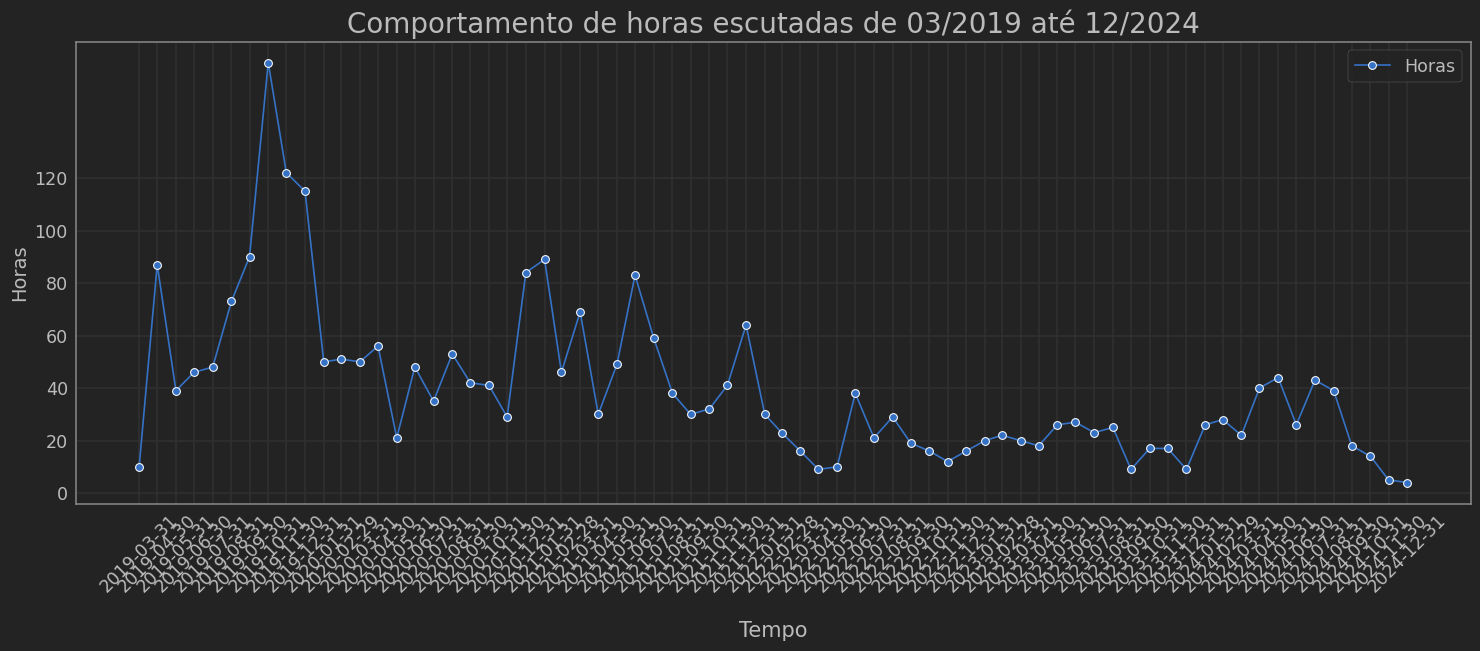

In [49]:
# setando tamanho do gráfico
ax = plt.subplots(figsize=(18, 6))
# atribuindo dados ao gráfico
ax = sns.lineplot(x='endTime',
                  y='hours',
                  data=horas_escutadas_por_mes,
                  marker='o')
# atribuindo titulo
ax.set_title('Comportamento de horas escutadas de {} até {}'.format(
    inicio[3:], fim[3:]),
             fontsize=20)
# setando legenda
ax.legend(['Horas'], loc='upper right')
# titulo label x
ax.set_xlabel('Tempo', fontsize=15, labelpad=18)
# titulo label y
ax.set_ylabel('Horas', fontsize=14)
# setando escala da eixo x
# horas_escutadas_por_mes.index.strftime('%Y-%m')
plt.xticks(horas_escutadas_por_mes.index)
# setando escala da eixo y
plt.yticks([0, 20, 60, 40, 80, 100, 120])

plt.xticks(rotation=45)

# salvando imagem do gráfico
plt.savefig(f'output/figures/{user_name}_horas escutadas.png', bbox_inches='tight')
plt.show()

<a id='8'></a>
---

[Retorna ao Índice](#indice)
## 8. Verificando horas tocas por Ano.

In [50]:
# criando coluna nova contendo os anos
spotify['year'] = spotify['endTime'].dt.year
# visualizando dados
spotify.head(3)

,platform,ms_played,conn_country,ip_addr,trackName,artistName,albumName,spotify_track_uri,episode_name,episode_show_name,...,reason_end,shuffle,skipped,offline,incognito_mode,ts_transformado,offline_timestamp_t,endTime,hours,year
0,"Android OS 9 API 28 (motorola, moto g(6) plus)",0,BR,187.119.230.96,Ta Tum Tum,MC Kevinho,Ta Tum Tum,spotify:track:6etab3UBCo5GOTMZqUvRka,None,None,...,endplay,True,False,False,False,2019-11-11 00:10:22,None,2019-11-11 00:10:22,0.000000,2019
1,"Android OS 9 API 28 (motorola, moto g(6) plus)",0,BR,187.119.230.96,Aperte O Play - Ao Vivo,Simone & Simaria,Aperte O Play!,spotify:track:5M8qHiAV6b0jo3phlyhxcR,None,None,...,endplay,True,False,False,False,2019-11-11 00:11:09,None,2019-11-11 00:11:09,0.000000,2019
2,"Android OS 9 API 28 (motorola, moto g(6) plus)",4886,BR,187.119.230.96,Blurry,Puddle Of Mudd,Come Clean,spotify:track:0FLBNqc5oAiTt4J2e3fe3y,None,None,...,fwdbtn,True,False,False,False,2019-11-11 00:11:16,None,2019-11-11 00:11:16,0.001357,2019


In [51]:
spotify['year'].unique()

array([2019, 2020, 2021, 2022, 2023, 2024], dtype=int32)

In [52]:

# agrupando dados por ano
horas_tocas_por_Ano = spotify.groupby(['year'])[[
    'hours'
]].sum().round(0).reset_index().sort_values(by=['hours'], ascending=False)
# visualizando dados
horas_tocas_por_Ano

,year,hours
0,2019,794.0
2,2021,629.0
1,2020,561.0
5,2024,308.0
3,2022,241.0
4,2023,234.0


<a id='8_1'></a>
---

[Retorna ao Índice](#indice)
### 8.1 Visualizando Gráfico das horas escutadas por ano.

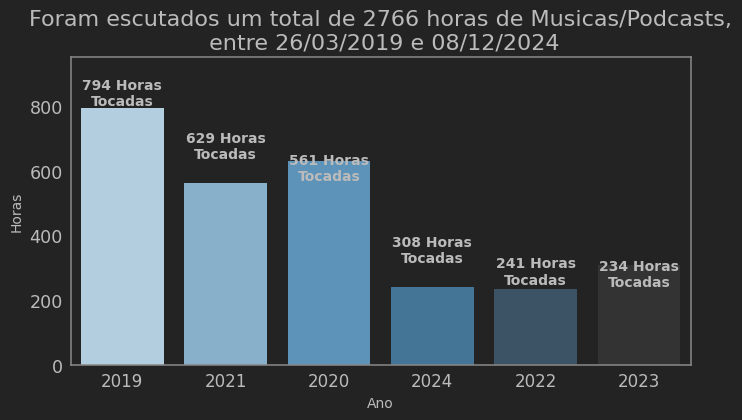

In [53]:
# Definindo variáveis
anos = horas_tocas_por_Ano.year
horas = horas_tocas_por_Ano.hours

# Setando tamanho do gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Atribuindo dados ao gráfico
sns.barplot(x=anos, y=horas, palette="Blues_d", ax=ax, hue=anos, dodge=False, legend=False)

# Setando título
ax.set_title(
    'Foram escutados um total de {} horas de Musicas/Podcasts,\n entre {} e {}'.format(
        int(spotify['hours'].sum().round()), inicio, fim),
    fontsize=16)

# Setando título do eixo X
ax.set_xlabel('Ano', fontsize=10)

# Setando título do eixo Y
ax.set_ylabel('Horas', fontsize=10)

# Definindo ticks fixos para o eixo X antes de setar os rótulos
ax.set_xticks(range(len(anos)))
ax.set_xticklabels(anos, size=12)

# Valor Maximo para o Eixo y
ax.set_ylim(0, max(horas) * 1.2)


# Desativando a grade
ax.grid(False)

# Adicionando anotações às barras
for i, v in enumerate(horas):
    ax.annotate(f"{int(v)} Horas\nTocadas",
                xy=(i, v),
                fontsize=10,
                ha='center',
                va='bottom',
                fontweight='bold')

# Salvando imagem do gráfico
plt.savefig(f'output/figures/{user_name}_horas_escutadas_por_anos.png', bbox_inches='tight')

plt.show()

<a id='9_1'></a>
---

[Retorna ao Índice](#indice)
## 9. Verificando quais foram as bandas mais escutadas.

In [64]:
top_artistas = spotify[['artistName', 'hours']]
top_artistas

,artistName,hours
0,MC Kevinho,0.000000
1,Simone & Simaria,0.000000
2,Puddle Of Mudd,0.001357
3,Queen,0.001627
4,The Hives,0.055456
...,...,...
74699,Journey,0.075259
74700,KISS,0.086203
74701,AC/DC,0.034667
74702,Mc Dricka,0.010331


In [65]:
# agrupando os dados por artistas e horas
top_10_artistas = top_artistas.groupby(['artistName'])['hours'].sum().round(0).sort_values(
    ascending=False).head(10).reset_index()

# visualizando os dados
top_10_artistas

,artistName,hours
0,Avenged Sevenfold,110.0
1,Os Barões Da Pisadinha,62.0
2,Emicida,35.0
3,Aviões do Forró,31.0
4,Bruno & Marrone,31.0
5,João Gomes,30.0
6,Leonardo,29.0
7,Five Finger Death Punch,24.0
8,Grupo Menos É Mais,23.0
9,Maroon 5,20.0


<a id='9_1'></a>
---

[Retorna ao Índice](#indice)
### 9.1 Visualizando Gráfico das Bandas Mais Tocadas.

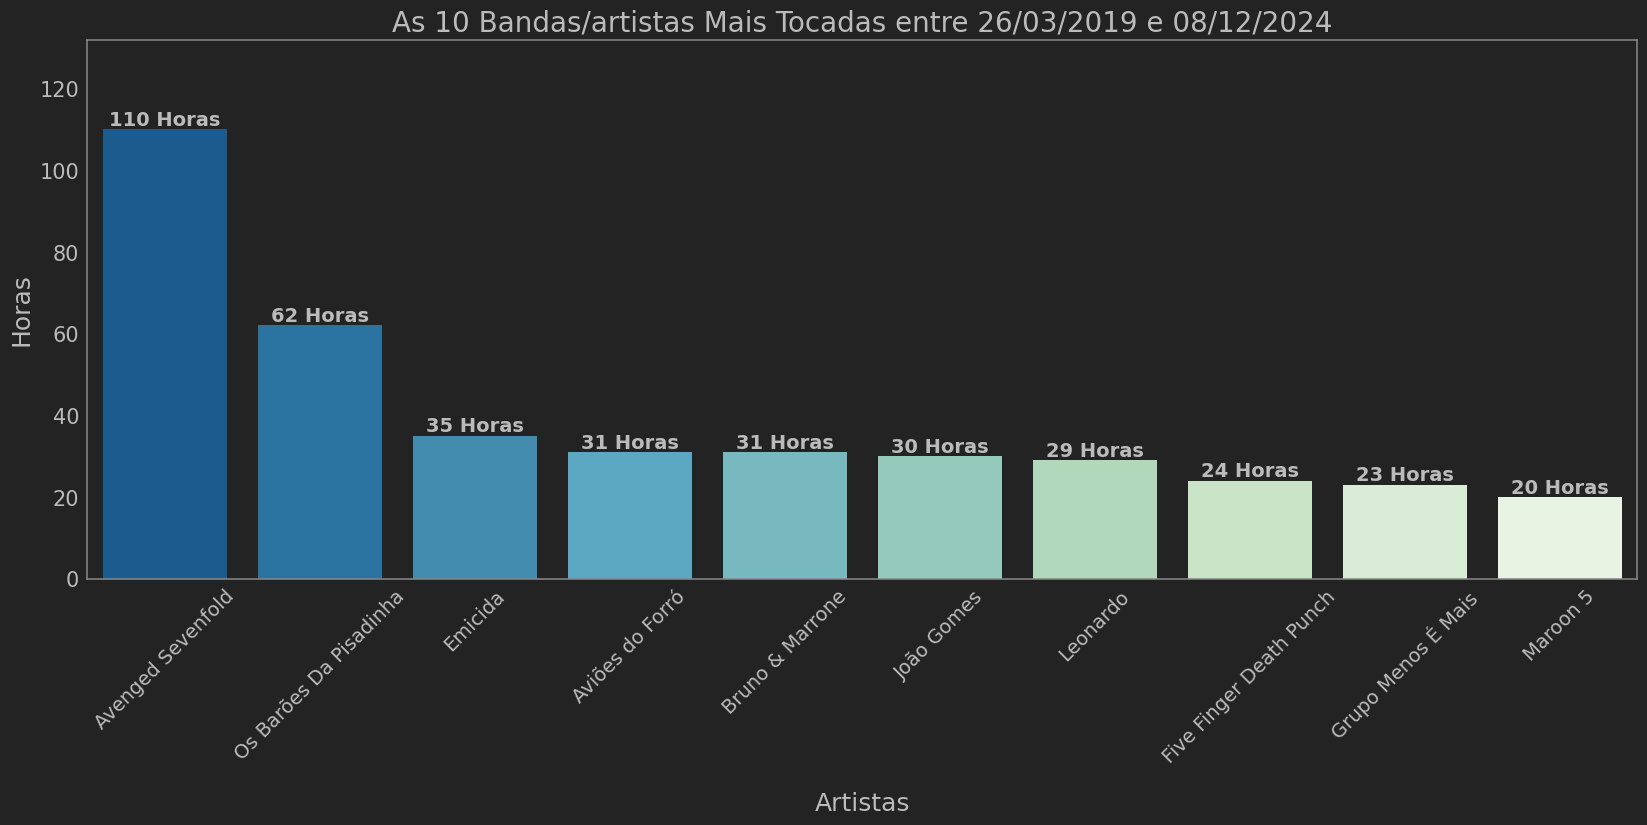

In [71]:
# Definindo variáveis
artista = top_10_artistas.artistName
horas = top_10_artistas.hours

# Setando tamanho do gráfico
fig, ax = plt.subplots(figsize=(20, 7))

# Atribuindo dados ao gráfico
sns.barplot(x=artista, y=horas, palette="GnBu_r", ax=ax, hue=artista, dodge=False, legend=False)

# Setando título
ax.set_title('As 10 Bandas/artistas Mais Tocadas entre {} e {}'.format(inicio, fim), fontsize=20)

# Setando título do eixo X
ax.set_xlabel('Artistas', fontsize=18, labelpad=18)

# Setando título do eixo Y
ax.set_ylabel("Horas", fontsize=18)

# Definindo ticks e rótulos do eixo X
ax.set_xticks(range(len(artista)))
ax.set_xticklabels(artista, size=14)

# Valor Maximo para o Eixo y
ax.set_ylim(0, max(horas) * 1.2)
ax.tick_params(axis='y', labelsize=15)

# Removendo grade do gráfico
ax.grid(False)

# Rotacionando rótulos do eixo X 
plt.xticks(rotation=45)

# Adicionando anotações às barras
for i, v in enumerate(horas):
    ax.annotate(f"{int(v)} Horas",
                xy=(i, v),
                fontsize=14,
                ha='center',
                fontweight='bold',
                va='bottom')

# Salvando imagem do gráfico
plt.savefig(f'output/figures/{user_name} - Os artistas mais tocados.png', bbox_inches='tight')

plt.show()


## 6. Verificando quais foram as musicas mais tocadas.

In [73]:
artist = spotify[['artistName', 'hours', 'trackName']]

In [75]:
# agruprando os dados pelas musicas e suas horas tocadas
as_mais_tocadas = artist.groupby(['trackName', 'artistName'])[[
    'hours'
]].sum().round(0).sort_values(by='hours', ascending=False).reset_index().head(10)

# visualizando dados
as_mais_tocadas

,trackName,artistName,hours
0,Never Forget You,Noisettes,13.0
1,Losing My Religion,R.E.M.,9.0
2,Hail to the King,Avenged Sevenfold,8.0
3,Anastasia,Slash,7.0
4,Vou Te Amar (Cigana),Hugo Pena & Gabriel,7.0
5,Até Que Durou / Tu Mandas No Meu Coração / Ado...,Grupo Menos É Mais,7.0
6,In the Heat of the Moment,Noel Gallagher's High Flying Birds,7.0
7,Lover,Taylor Swift,6.0
8,Ilusão (Cracolândia),MC Hariel,6.0
9,Set dos Casados,Mc Davi,6.0


### 6.1 Visualizando Gráfico das musicas mais tocadas.

In [83]:
from textwrap import wrap
# filtrando apenas os nomes das musicas
labels = as_mais_tocadas.trackName.values.tolist()

# Criando uma função para quebrar o texto depois de 20 caracteres
labels= ['\n'. join(wrap(l,15)) for l in labels ]
print(labels)

['Never Forget\nYou', 'Losing My\nReligion', 'Hail to the\nKing', 'Anastasia', 'Vou Te Amar\n(Cigana)', 'Até Que Durou /\nTu Mandas No\nMeu Coração /\nAdorei / Supera', 'In the Heat of\nthe Moment', 'Lover', 'Ilusão\n(Cracolândia)', 'Set dos Casados']


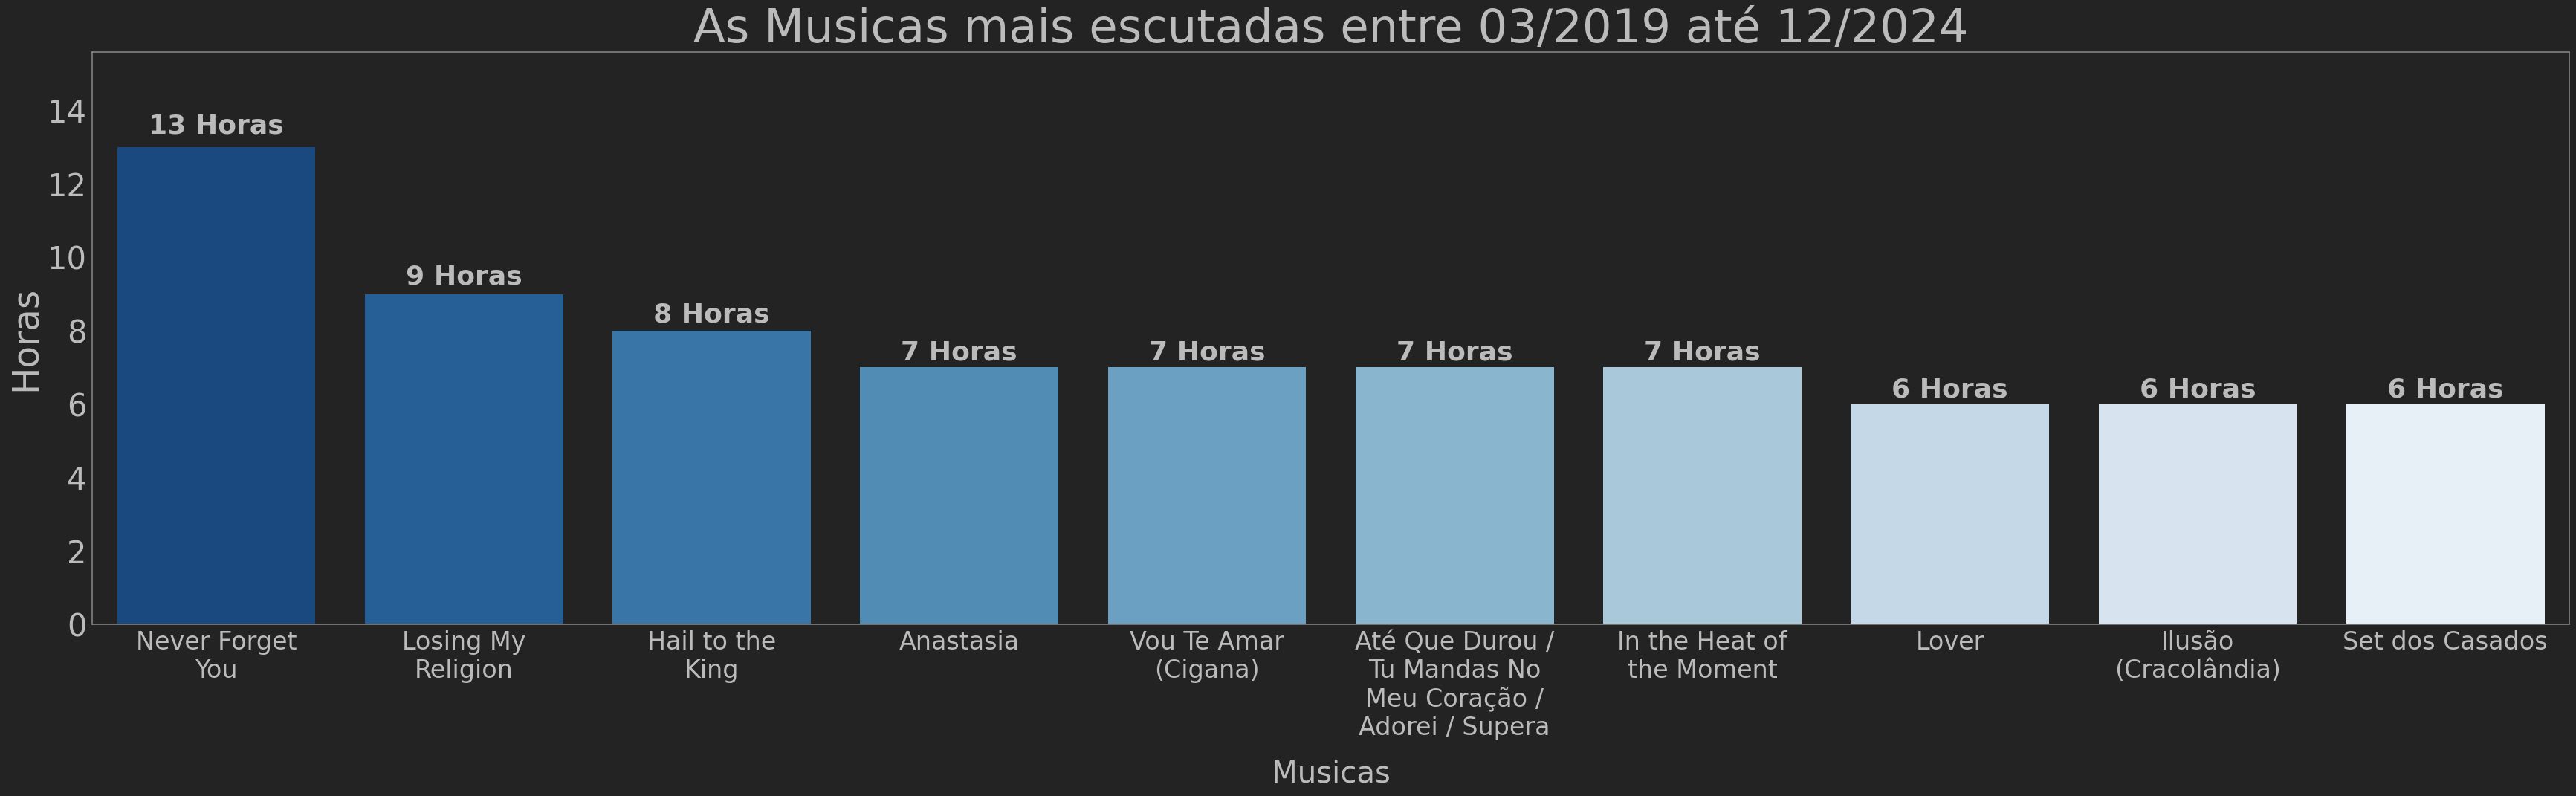

In [85]:
# Definindo variáveis
musicas = as_mais_tocadas.trackName
horas = as_mais_tocadas.hours

# Setando tamanho do gráfico
fig, ax = plt.subplots(figsize=(43, 10))

# Atribuindo dados ao gráfico
sns.barplot(x=musicas, y=horas, palette="Blues_r", ax=ax, hue=musicas, dodge=False, legend=False)

# Setando título
ax.set_title('As Musicas mais escutadas entre {} até {}'.format(inicio[3:], fim[3:]), fontsize=45)

# Setando título do eixo X
ax.set_xlabel('Musicas', fontsize=29, labelpad=18)

# Setando título do eixo Y
ax.set_ylabel("Horas", fontsize=35)

# Setando tamanho da fonte do eixo X e rotacionando rótulos 
ax.set_xticks(range(len(labels))) 
ax.set_xticklabels(labels, size=24, rotation=0)


# Valor Maximo para o Eixo y
ax.set_ylim(0, max(horas) * 1.2)
ax.tick_params(axis='y', labelsize=30)

# Removendo grade do gráfico
ax.grid(False)

# Adicionando anotações às barras
for i, v in enumerate(horas):
    ax.annotate(f"{int(v)} Horas",
                xy=(i, v * 1.03),
                fontsize=26,
                fontweight='bold',
                ha='center',
                va='baseline')

# Salvando imagem do gráfico  
plt.savefig(f'output/figures/{user_name} - As musicas mais escutadas.png', bbox_inches='tight')

plt.show()
